# CA 1: DVizHDip - Gabriel Villasmil

**Table of contents:**
- Scenario
- Loading Data
- Data Wrangling
- EDA: **Part 1:** Data analysis and Visualizations

        - Question 1

        - Question 2

        - Question 3

        - Question 4

        - Question 5

    **Part 2:** Statistically Relevant Question of my own

- Conclusion

- References


## Scenario

You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Summer season. 

Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python, in a Jupyter Notebook.  Please note that the visualizations MUST BE STATIC, not interactive.

The companies CTO also requires you to rationalize all the decisions that you have made in your Jupyter Notebook report.    

This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.    

## Loading Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading dataset
df = pd.read_csv("vgsales.csv")


## Data Wrangling

- As we will see, this dataset has a lot of Missing values, making it difficult, if not impossible, to analyze without proper data handling 
- The first thing I did was standardize the column names to lower case sensitive, just to make sure everything will be coded properly
- I changed `tbd` values to `Nan` in `user_score` because I ran into some problems with it when trying to continue with the analysis.
- `year_of_release` and `global_sales` columns were dropped because I cannot fill them with nothing; they must have specific data in there to have valid data analysis results. So, because I cannot fill them with the mean or the mode, I needed to drop them.
- All numerical columns were forced to numeric for better analysis.
- All numerical columns `Nan` values were filled in this case with the mean for proper analysis.
- All catagorical (letters) columns `Nan` values were filled in this case with `Unknown` values, alter on they were filtered so they were not shown, but it’s important to have them, maybe in the future if we expand this dataset and fill those missing values with the actuals ones we will get much better result out of these analysis.

In [20]:
# Basic info
display(df.head())
display(df.info())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

In [21]:
# Lowecase columns
df.columns = df.columns.str.lower()

# Replacing 'tbd' to NaN in user_score
df["user_score"] = df["user_score"].replace("tbd", np.nan)

# Dropping 'year_of_release' and 'global_sales' missing values
df.dropna(subset=["year_of_release", "global_sales"], inplace=True)

# Lets force numerical columns to numeric
numeric = [
    "na_sales", "eu_sales", "jp_sales", 
    "other_sales", "critic_score", 
    "critic_count", "user_score", "user_count"
]

df[numeric] = df[numeric].apply(pd.to_numeric)

# Filling numeric columns with their mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Filling categorical columns with "Unknown"
df.fillna("Unknown", inplace=True)

# Display and Check, use display to see both
display(df.info())
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16450 non-null  object 
 1   platform         16450 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16450 non-null  object 
 4   publisher        16450 non-null  object 
 5   na_sales         16450 non-null  float64
 6   eu_sales         16450 non-null  float64
 7   jp_sales         16450 non-null  float64
 8   other_sales      16450 non-null  float64
 9   global_sales     16450 non-null  float64
 10  critic_score     16450 non-null  float64
 11  critic_count     16450 non-null  float64
 12  user_score       16450 non-null  float64
 13  user_count       16450 non-null  float64
 14  developer        16450 non-null  object 
 15  rating           16450 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


None

name               0
platform           0
year_of_release    0
genre              0
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
critic_score       0
critic_count       0
user_score         0
user_count         0
developer          0
rating             0
dtype: int64

## EDA: Data analysis and Visualizations

Lets answer now these 5 relevant questions:

1. What are the top 5 publishers by global sales?  
2. Is there a correlation between the “na_sales” and “eu_sales” for the years 2010-2014?  
3. What is the distribution of the 3 most popular (by user_score) game genres?  
4. Do older games (2005 and earlier) have a higher MEDIAN “eu_sales” than newer games (after 2005)?  
5. What are the 3 most common “developer” in the dataset?  


Before that, let's answer briefly the **General Design** decisions for this project:

- All questions are going to be answered with a specifically representative chart. The explanation of why a chart has been chosen above another to answer a particular question will be given for each and individual case.

- Color choices: for this particular report, I am going to focus more on creating contrast among the metrics in the chart. We are going to see in questions 2, 3, and 4 how contracts will play a huge role in order to please the viewer when making the analysis. With that being said, in this project, I will take advantage of the principle number 8 out of the "9 Principles of Design" to keep an engaging experience.

- Titles and Labels, in this case, are going to be used in all charts because I see the importance of letting the stakeholders know what they are seeing. I do not want them to assume anything but to see everything clearly.

- Figure size is going to be set individually for each chart, letting the viewer see things in their proper space and not all above the others, creating disbalanced charts and breaking the rhythm.

- Rationale of the Feature Selection, Visualization, and a Conclusion will be given for all charts in their respective markdown section.



### Question 1: What are the top 5 publishers by global sales? 

**Feature Selection:**
- As we saw earlier in this dataset we have a column named `publisher` and `global_sales`

- I am going to group those `publisher` using python by that `global_sales` column, then I am going to get the total and take the top 5 results (the ones with a higher total)

**Visualization**
- For simplicity in categorical values comparision I will use in this case a **Bar Chart**, we are going to get some columns, representing each publisher and on the left hand side in the y axis we are going to see the actual total sales per publisher.

- **Bar charts** makes things seemed grouped while maintaining a level of distinction among the axis.

- I used Sky blue color in this case to represent the high level of sales the top 5 publishers represents in the industry, making it look sales goes above the sky.

**Conclusion**

We are talking about a multimillion dollar industry, the gaming industry, These values represent millions of dollars. With that being said, thanks to this chart we can spot that Nintendo by far is the largest sales maker with almost doubling its closest competitor in sales.

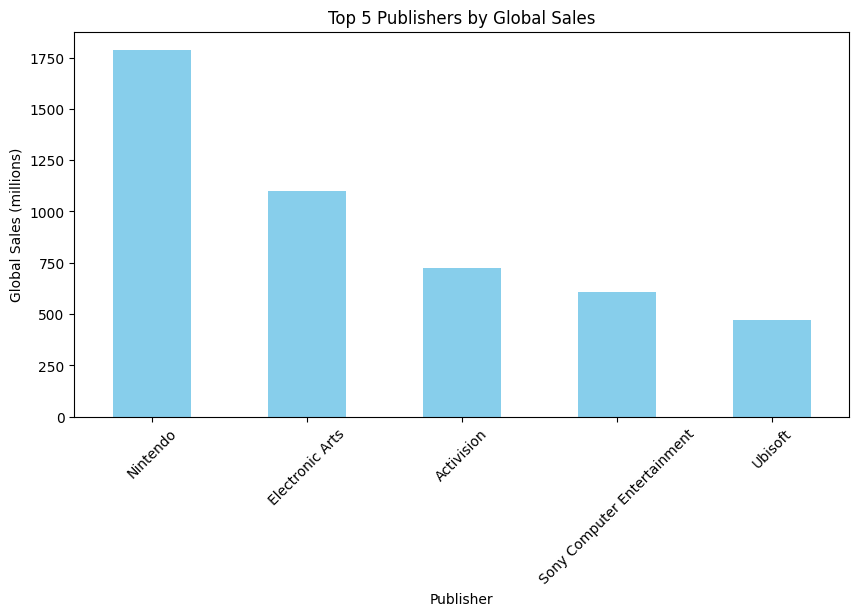

In [22]:
# Question 1: Top 5 Publishers by Global Sales
top_publishers = df.groupby('publisher')['global_sales'].sum().nlargest(5)

plt.figure(figsize=(10,5))
top_publishers.plot(kind='bar', color='skyblue')
plt.title("Top 5 Publishers by Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=45)
plt.show()

### Question 2: Is there a correlation between the “na_sales” and “eu_sales” for the years 2010-2014?  

**Feature Selection:**
- First lets deal with the years. I am going to use python to create a new df filtering `year_of_release` years between 2010 inclusive and 2014 inclusive

- Second, let's deal with the regions. Now, I'm going to get the correlation between `na_sales` (North America) and `eu_sales` (Europe). This is going to give me a number between 0-1; the closer to 1 the number is, the stronger the correlation they have.

- Let's plot this

**Visualization**
- This is going to be the most difficult chart in this whole report, but I did it this way because when you see it, it is very pleasant to see all that information at once while maintaining harmony.

- With that being said, I am going to use a **Scatter Plot**  with a *Regression Line* and display the *Corr Number* in the chart as well.

- **Scatter Plot** are powerful when we are talking about correlations. At first glance, we can spot if the y and the x axis dots follow a path in their distribution among the chart. That's why I chose this one. Now, while I was coding this chart, I saw that the visual was not giving me enough information, I saw that only if the viewer is used to scatter plots will be able to find the pattern but that it would not be that easy for a person (Stakeholder) who is not used to these charts to spot on what the image is showing, for that reason I added a coloured *Regression Line* and *Corr Number*, depending on the correlation the features had (Corr number) both the number displayed and the line will have a certain colour based in the colour gradient in the legend on the right hand side.

- Remember I mentioned the use of contrast, especially in this second answer. So, starting, I drew the plot with black dots and a white background.

- I used the "coolwarm" of python matplotlib library to create a gradient spectrum for the correlation colors, going from blue (Weak corr) to red (Strong corr)

- I plotted the *Regression Line* along the chart following its assigned correlation color thanks to python, and I displayed the *Corr Number* as well to be more specific while maintaining its assigned correlation color result.

- On the x axis we have the `na_sales` in millions and on the y axis we have the `eu_sales` in millions.

- If everything works fine, you will be able to see a black dotted scatter plot with a colored *Regression Line* and a *Corr Number* depending on how strong or weak the correlation is between North America and Europe sales between 2010 and 2104.

**Conclusion**

Beautiful. Now, let's see what the results show. Let's start with the scatter plot dots. we can a see when America makes more money Europe makes more money as well, we see **there is a correlation between EU Sales and North America Sales between 2010 and 2014**.

Now I see red all over the chart, which means **Strong Correlation**:

- *Corr Number* is 0.79 red, very close to 1, very strong correlation
- *Regression Line* is steady upwards and red, meaning a strong positive correlation between these features


C:\Users\gabri\AppData\Local\Temp\ipykernel_20392\2274849156.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmap, label="Correlation Strength (0 to 1)")


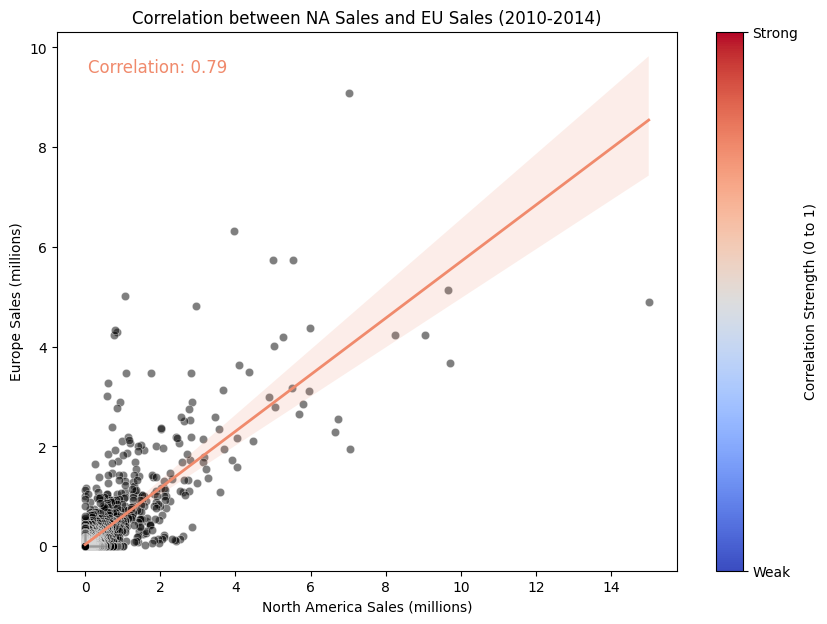

In [23]:
# Question 2: Correlation between North America Sales and Europe Sales from the years 2010-2014

# Data from years 2010-2014
df_2010_2014 = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2014)]

# Getting Correlation Number between NA Sales and EU Sales
corr = df_2010_2014['na_sales'].corr(df_2010_2014['eu_sales'])

# Scatter plot with black dots
plt.figure(figsize=(10, 7))

sns.scatterplot(x=df_2010_2014['na_sales'], y=df_2010_2014['eu_sales'], alpha=0.5, color='black')

# Coolwarm colormap for correlation gradient
cmap = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=0, vmax=1))

# Plotting a Regression Line matching the color with its correlation
sns.regplot(x=df_2010_2014['na_sales'], y=df_2010_2014['eu_sales'], scatter=False, 
            line_kws={'color': cmap.to_rgba(corr), 'lw': 2})

# Corr Number matching the color with its correlation
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color=cmap.to_rgba(corr))

# Titles and labels
plt.title("Correlation between NA Sales and EU Sales (2010-2014)")
plt.xlabel("North America Sales (millions)")
plt.ylabel("Europe Sales (millions)")

# Corr color gradient lengend with Weak and Strong values
cbar = plt.colorbar(cmap, label="Correlation Strength (0 to 1)")

cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Weak', 'Strong'])

# Plot
plt.show()

### Question 3: What is the distribution of the 3 most popular (by user_score) game genres?  

**Feature Selection:**
- Using python groupby() method I am going to group the top 3 `genre` by `user_score` based on the mean.

- I made a new df with only those top 3 `genre`

- To change from the mean, I am going to use the median `user_score` out of this new df as again grouped by `genre`.

**Visualization**
- **Box Plots** in this case are great if you want to see distribution among grouped features while considering outliers as well.

- X axis shows the top 3 Genres while Y axis shows its User Score median levels

- I chose a variety of pastel colors to keep a Pattern for the 3 top Genres, even though we are visualizing 3 differents elements. The smooth color that all of them have makes the viewers think that there is something in common among them. First, they are the top 3, and second, the distribution of means are distributed in the same ranges as well.

- I wanted to draw a line through the mean of medians without interrupting the whole design. That's why I added a grey line, which makes the visual clear while keeping it smooth enough to keep the principle of Unity.


**Conclusion**

The top 3 Genres are **Platform, Role-Playing Games, and Fighting**, making the Role-Playing games the most normally liked among them but all those seem to be much appreciated in the Gaming Industry. We can see the outliers of them are mostly above the average, especially in **Role-Playing Games**



C:\Users\gabri\AppData\Local\Temp\ipykernel_20392\3697553488.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='user_score', data=df_top_genres, palette='pastel')


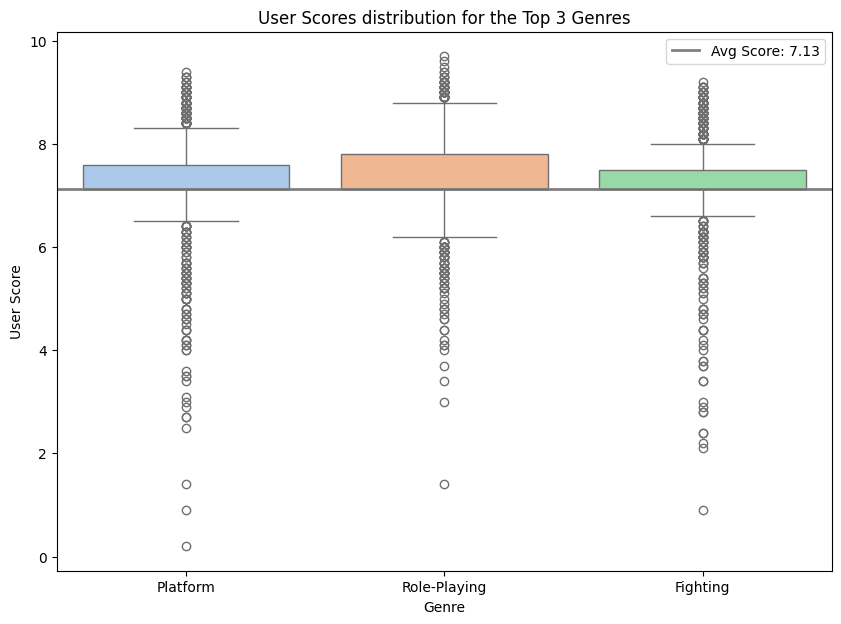

In [24]:
# Question 3: Distribution of 3 Most Popular Genres by User Score

# Top 3 genres by mean user_score and converting them into a df
top_genres = df.groupby('genre')['user_score'].mean().nlargest(3).index

df_top_genres = df[df['genre'].isin(top_genres)]

# Median user score for those 3 genres in new df
median_scores = df_top_genres.groupby('genre')['user_score'].median()

# For the Chart Line: Mean of those medians
mean_of_medians = median_scores.mean()

# Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x='genre', y='user_score', data=df_top_genres, palette='pastel')

# Mean of medians Line and Legend
plt.axhline(y=mean_of_medians, color='grey', linestyle='-', linewidth=2, label=f"Avg Score: {mean_of_medians:.2f}")

plt.legend()

# Title and labels
plt.title("User Scores distribution for the Top 3 Genres")
plt.xlabel("Genre")
plt.ylabel("User Score")
plt.show()



### Question 4: Do older games (2005 and earlier) have a higher MEDIAN “eu_sales” than newer games (after 2005)?

**Feature Selection:**
- We need to deal with MEDIAN in this case. So what I am going to do is to filter my df into two variables, one called "older_games" and another "newer_games", both of them I am going to get the median of `eu_sales` but in the old one I will include 2005 and backwards and in the new one 2006 and on

**Visualization**
- In this case, because there are only two features to compare with and while I was coding this I saw a big difference in values. What is better than a **Pie Chart** with a percentage number to demonstrate the proportion of each when comparing these two features?

- Two primary distinct colors were used to create contrast in this section.

-  White color numbers showing % in the inner circle was used to have an engaging look.

- Font size was enlarged in this case due to the amount of space this chart gave to us.

- I will take advantage of the Emphasis principle of design by showing a big chunk of information (image-wise) belonging to the strongest variable in this comparison representing the "Old games" with the color blue and showing a small-sized portion of the other variable (New)

**Conclusion**

**Older games by far have a larger MEDIAN sales** than New ones. Being a gamer for so many years and seeing this industry grow, this surprised me. The only thing that comes to my mind is piracy, but that's for a deeper study.


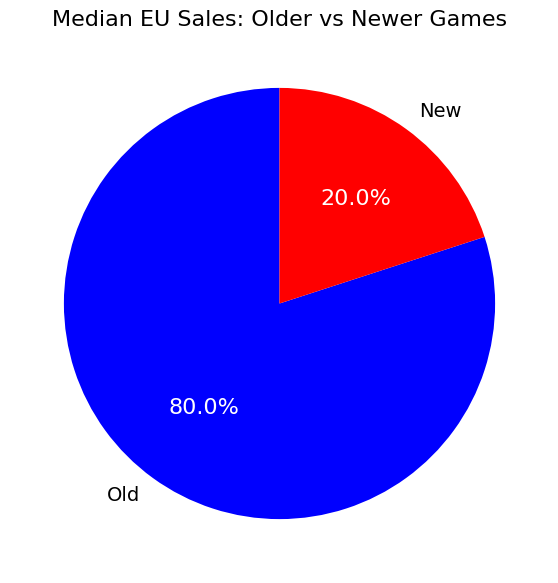

In [25]:
# Question 4: Median EU Sales Comparison Before and After 2005

# Variables for Median EU Sales for games before and after 2005
older_games = df[df['year_of_release'] <= 2005]['eu_sales'].median()
newer_games = df[df['year_of_release'] > 2005]['eu_sales'].median()

# Pie chart
labels = ['Old', 'New']
sizes = [older_games, newer_games]
colors = ['blue', 'red']

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 14})

# Font enlargement and engaging text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)

# Plot
plt.title("Median EU Sales: Older vs Newer Games", fontsize=16)
plt.show()

### Question 5: What are the 3 most common “developer” in the dataset?  

**Feature Selection:**
- First of all, here I need concise names. I know this dataset had a lot of `developer` (column) missing values, and I got rid of them by placing "Unknown" instead. That is fine. Now, I do not want to show any of that, so what I am going to do is filter those unknown values out.

- Now I am going to filter this new df and I am going to count how many times a developer appears in every row, and I am going to get the top 3 with the .nlargest(3)

**Visualization**
- **Design:** This is the only chart that does not have a legend in the X axis, and it has a almost a primary color orange shining upon the screen (Yellow did not look nice). I wanted to draw the stakeholder's attention to this chart by doing so. It is important to know who is making the best product, to sell it (or see if there is upcoming competition) to make the sales growth in the business.

- Racing Results, Competition, Music Billboard Charts, that is all I can see when I see a **Horizontal Bar chart**, for that very reason I used it at this time.

- To keep the Unity, I maintained a white background for all dashboards, this one included.

**Conclusion**

The most common developers are **Ubisoft, EA Sports, and EA Canada**. It would then be interesting to see which one of them makes the most `global_sales`, it can happen that Ubisoft might be the most common developer but not the one with the most sales.



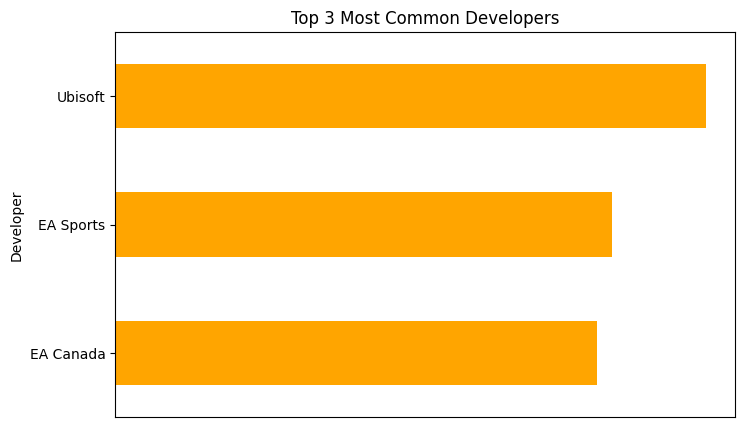

In [26]:
# Question 5: Most Common Developers

# Filter out 'Unknown' values
df_filtered = df[df['developer'] != 'Unknown']

# Top 3 most common developers
top_developers = df_filtered['developer'].value_counts().nlargest(3)

# Horizontal Bar Chart
plt.figure(figsize=(8, 5))
ax = top_developers.plot(kind='barh', color='orange')

# Lets remove the x axis in this case
ax.xaxis.set_visible(False) 

# Title and Labels
plt.title("Top 3 Most Common Developers")
plt.ylabel("Developer")

# This way I will get the top value at the top
plt.gca().invert_yaxis() 

# Plot
plt.show()

## Part 2: Statistically Relevant Question of my own

- Does Critic Score have a relationship between Global Sales?

### Does Critic Score have a relationship between Global Sales?

Normally, criticism can affect your reputation , and as a business those critics might have an impact in your total revenue, having the people on your side can help you grow in the industry... or no?

**Feature Selection:**
- I going to take `critic_score` and `global_sales` and plot them directly into a **Bubble Chart** and see what it shows.

**Visualization**
- Similar to Scatter Plots we have the **Bubble Chart**, but there is a characteristic that the last one distinguish itself from the first one. The **Bubble chart** can give us a third dimension of study. Each bubble has a size, the size weights the importance of that metric in the data; the bigger the size, the more important,  creating a deeper understanding of what is being shown. For that reason, I chose for the last chart a **Bubble Chart**.

- I painted it in Blue, following the principle of Repetition, to make the viewer know we are still analyzing the same dataset (I have used the color blue since the beginning of this study).

**Conclusion**

Fairly enough, there is a positive correlation between User Critic and Global sales. If a game has a better review, sales will go up, simple. Still, there are some key points I found very interesting thanks to this last chart:
- It drew my attention that there is a huge bubble size above 80 million dollars with a global user score aprox. 7.7 out of 10. I really would move forward to see what that is all about if I want to improve my sales in this Summer Season
- Second there a straight line of bubbles moving upwards from 0 millions sales all the way untill 40 millions plus sales. I will try to find what game has this kind of sales growth without necessarily growing in User Score, I would say it has to be one of the Top franchises: GTA, COD, or Fifa, but that is speculation. I would go deeper to see what it is.


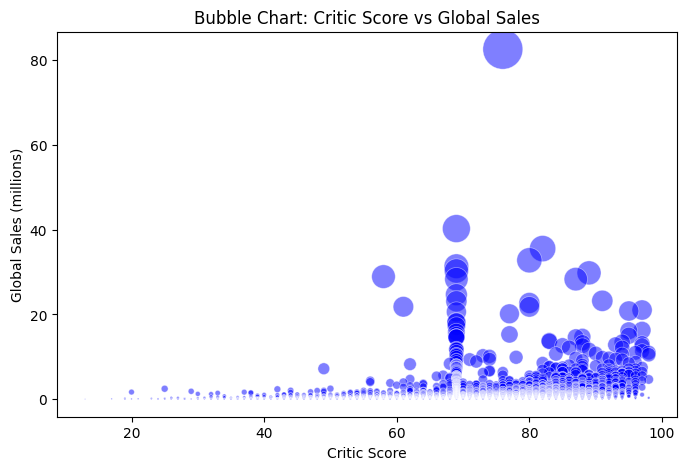

In [27]:
# Part 2: Statistically Relevant Question of my own - Relationship between Critic Score and Global Sales?

# Bubble chart Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['critic_score'], df['global_sales'], s=df['global_sales']*10, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title("Bubble Chart: Critic Score vs Global Sales")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (millions)")
plt.show()


## Conclusion

To give a great Conclusion, let's break down all key points in this analysis.

- We need more accurate data. Too many missing values. Stakeholders need to know this; it's crucial for decision making.
- We are going to focus on Nintendo, a top publisher that almost doubles its closest competitor. Marketing Campaigns: if Nintendo launches anything new, we will have it in our store; anything Mario is welcomed. Promos, gifts, or special offers related to Nintendo must be done.
- This company is based in Europe; Ireland has a strong correlation with USA sales. This summer, we need to copy what United States stores are doing to implement what is working in their system in ours.
- Role-Playing Games are our priority this summer; it is the most loved genre with the most positive outliers in this study.
- Classics are going to make our revenue growth, classic Nintendo's Mario Bros, Ncubes, Nintendos 64, classic games from Nintendo is our focus this summer.
- There is still room for improvement. I will recommend having a deeper analysis of the outliers, especially those that generate sales.




## References

Dougherty, J. and Ilyankou, I. (n.d.). - Scatter and Bubble Charts | Hands-On Data Visualization. [online] handsondataviz.org. Available at: https://handsondataviz.org/scatter-bubble-datawrapper.html.

Stack Overflow. (n.d.). How to invert the x or y axis. [online] Available at: https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis.

Zach (2021). How to Hide Axes in Matplotlib (With Examples). [online] Statology. Available at: https://www.statology.org/matplotlib-hide-axis/.